In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.')

# Q4

In [3]:
#Looking at top 5 rows of dataframe
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


# Q5

In [4]:
#Rows = 7662, Columns = 4
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Q6

In [5]:
gdp_df_less = gdp_df.drop('Value Footnotes', axis=1)

In [6]:
gdp_df_less

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
gdp_df_clean = gdp_df_less.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [9]:
gdp_df_clean['Year'].agg(['min', 'max'])

min    1990
max    2022
Name: Year, dtype: int64

gdp_df_clean['Country'].groupby(value_counts(sort=True))

In [10]:
gdp_df_clean.sort_values('Year', ascending=False)

,Country,Year,GDP_Per_Capita
4113,Lower middle income,2022,7127.774670
1704,Dominica,2022,11495.130423
1314,Chile,2022,25886.121356
3995,Libya,2022,19796.587498
4921,Nauru,2022,11109.803012
...,...,...,...
1627,Czechia,1990,23585.181494
1660,Dem. Rep. Congo,1990,1750.169739
6412,Spain,1990,27543.221532
1693,Denmark,1990,39027.978737


n = 0
m = 0
for year_count in countries_year_count['count']:
    if year_count == num_years:
        n += 1
    else:
        m += 1
print(str(n) + ' have data for all years')
print(str(m) + ' do not have data for all years')

In [11]:
gdp_df_clean['Year'].agg(['min', 'max'])
num_years = gdp_df_clean['Year'].max() +1  - gdp_df_clean['Year'].min()
print('Total number of years: ' + str(num_years))

Total number of years: 33


In [12]:
countries_year_count = gdp_df_clean['Country'].value_counts().reset_index()

In [13]:
countries_all_years = pd.array(countries_year_count[countries_year_count['count'] == num_years]['Country'])
countries_missing_years = pd.array(countries_year_count[countries_year_count['count'] != num_years]['Country'])

In [14]:
len(countries_all_years)

202

In [15]:
len(countries_missing_years)

40

In [16]:
countries_missing_years

<PandasArray>
[                  'Hungary',                   'Lebanon',
                     'Aruba',                     'Tonga',
                    'Bhutan',           'Slovak Republic',
                    'Kuwait',              'Turkmenistan',
                  'Cambodia',        'West Bank and Gaza',
    'Bosnia and Herzegovina',                    'Latvia',
                    'Israel',                   'Estonia',
                    'Serbia',                 'Lithuania',
                   'Iceland',                   'Moldova',
                  'Maldives',                   'Croatia',
                  'Slovenia',              'Small states',
                'Montenegro',                'San Marino',
                     'Libya',               'Timor-Leste',
                   'Liberia',        'Other small states',
                     'Qatar',                     'Palau',
                  'CuraÃ§ao',   'SÃ£o TomÃ© and Principe',
               'Afghanistan',             

# Question 8

In [17]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


C:\Users\timot\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


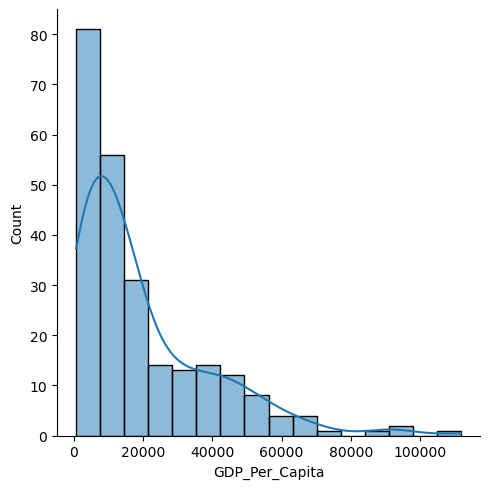

In [18]:
gdp_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

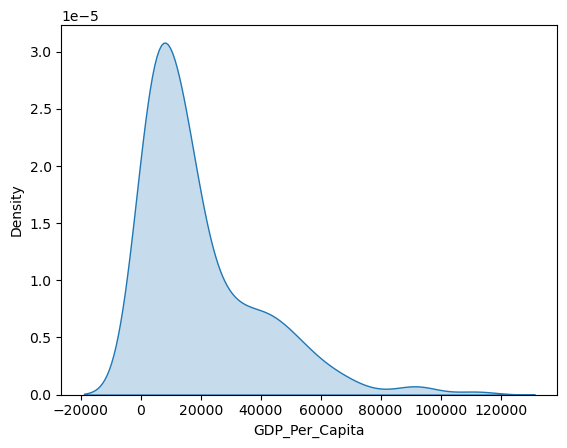

In [19]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)

<Axes: ylabel='GDP_Per_Capita'>

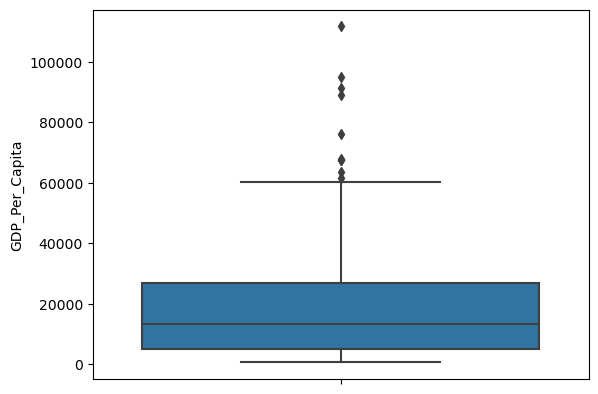

In [20]:
sns.boxplot( y=gdp_2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

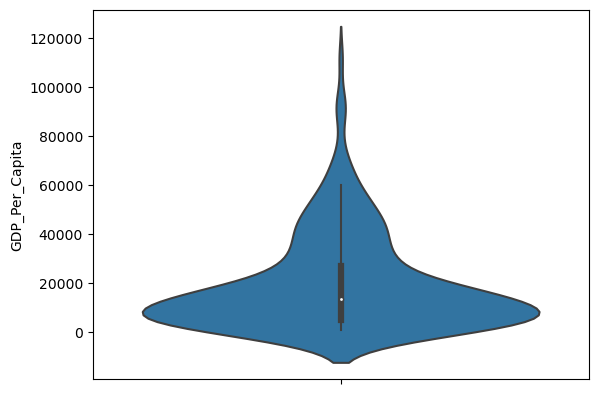

In [21]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])

# Question 9

In [22]:
round(gdp_2020["GDP_Per_Capita"].median(), 2)

13358.0

# Question 10

In [23]:
gdp_decades = gdp_df_clean[gdp_df_clean['Year'].isin([1990, 2000, 2010, 2020])]

In [24]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

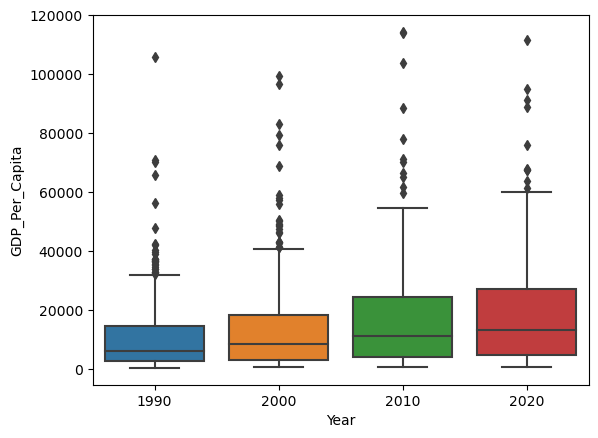

In [25]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

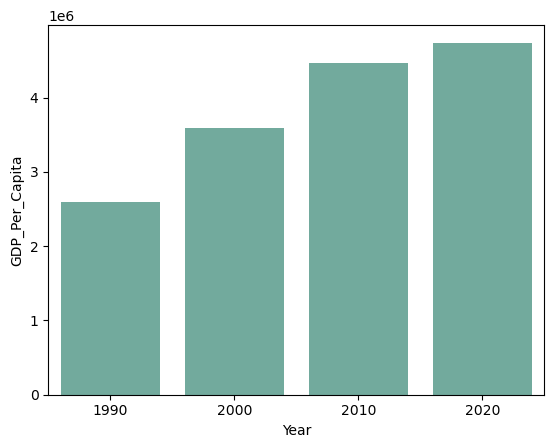

In [26]:
sns.barplot(
    y="GDP_Per_Capita",
    x="Year",
    data=gdp_decades,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

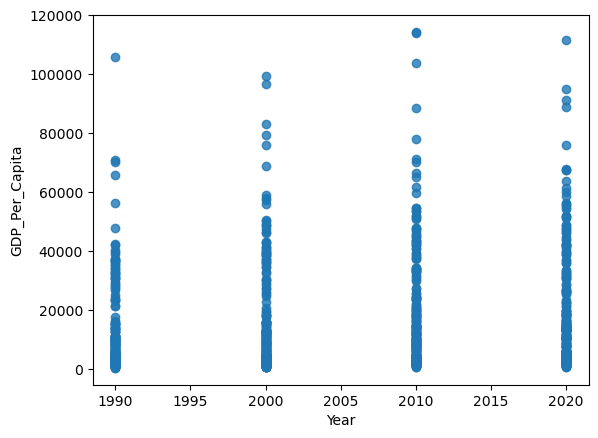

In [27]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    fit_reg=False
)
plt.show()

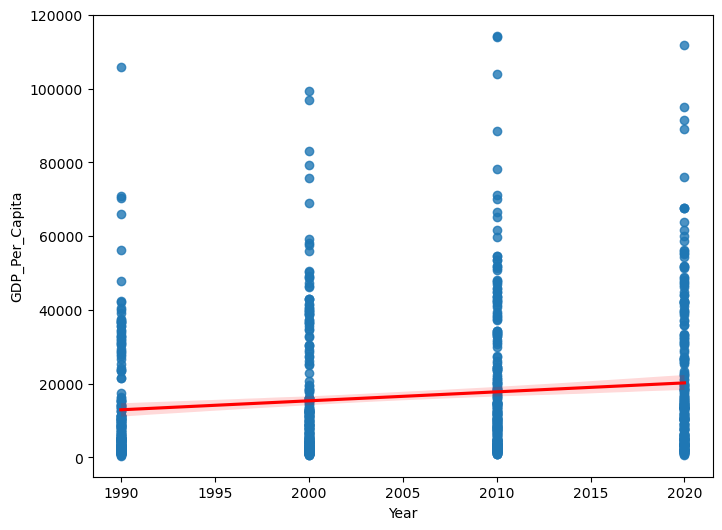

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

# Question 11

In [29]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [31]:
gdp_df_big_capita = gdp_df_clean[gdp_df_clean["GDP_Per_Capita"] > 100000]

In [37]:
gdp_df_big_capita.loc[gdp_df_big_capita["Year"].idxmin()]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

# Question 12

In [39]:
gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    111751.314751
Name: 4148, dtype: object

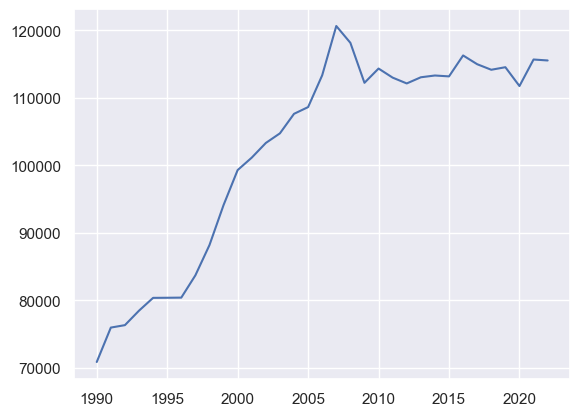

In [44]:
sns.set_theme()

# create data
gdp_plot = gdp_df_clean[gdp_df_clean["Country"] == "Luxembourg"]
 
# use the plot function
plt.plot(gdp_plot["Year"], gdp_plot["GDP_Per_Capita"])

# show the graph
plt.show()

# Question 13

In [45]:
gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    711.355263
Name: 973, dtype: object

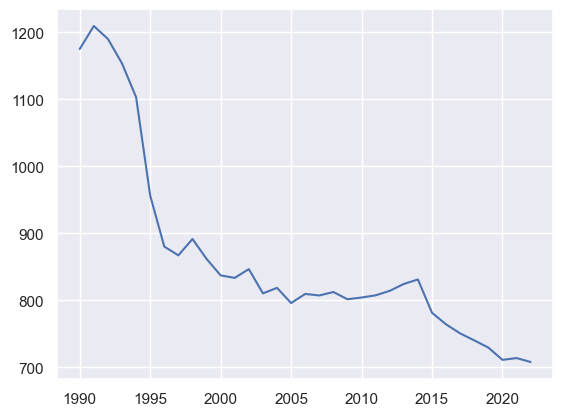

In [46]:
sns.set_theme()

# create data
gdp_plot = gdp_df_clean[gdp_df_clean["Country"] == "Burundi"]
 
# use the plot function
plt.plot(gdp_plot["Year"], gdp_plot["GDP_Per_Capita"])

# show the graph
plt.show()

# Question 14

In [77]:
internet_df = pd.read_csv('../data/internet_use.csv.', nrows=4495)

In [78]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


# Question 15

In [79]:
internet_df_less = internet_df.drop('Value Footnotes', axis=1)

In [80]:
internet_df_clean = internet_df_less.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [81]:
internet_df_clean

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# Question 16

In [82]:
internet_df_clean.groupby('Year')['Country'].count().sort_index()

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64

In [83]:
internet_df_clean['Year'].value_counts().head(43)

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64

In [84]:
internet_df_clean['Year'].agg(['min', 'max'])

min    1960
max    2014
Name: Year, dtype: int64

# Question 17

<Axes: xlabel='Year', ylabel='Count'>

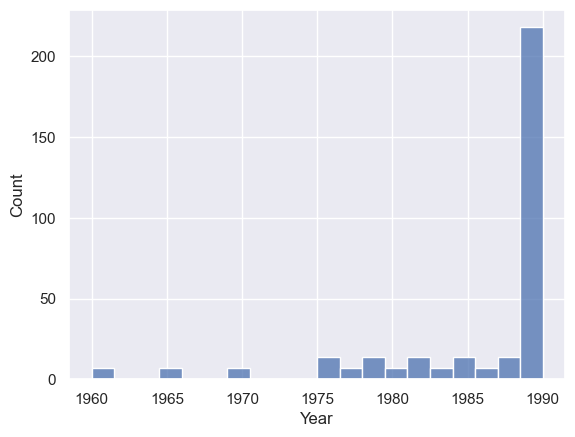

In [85]:
sns.histplot(internet_df_clean['Year'], binrange=(1960,1990), bins=20)

In [87]:
internet_df_clean.loc[internet_df_clean["Internet_Users_Pct"].idxmax()]
internet_df_clean[internet_df_clean["Internet_Users_Pct"] > 0]

In [88]:
internet_df_pct

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684


In [92]:
internet_df_clean.loc[internet_df_clean["Year"].idxmin()]

Country               Botswana
Year                      1960
Internet_Users_Pct         0.0
Name: 533, dtype: object

In [93]:
internet_df_clean[internet_df_clean["Internet_Users_Pct"] > 0]

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
